In [3]:
# 1. Packages and Data

# Packages Importing
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import talib as ta

No handles with labels found to put in legend.
No handles with labels found to put in legend.


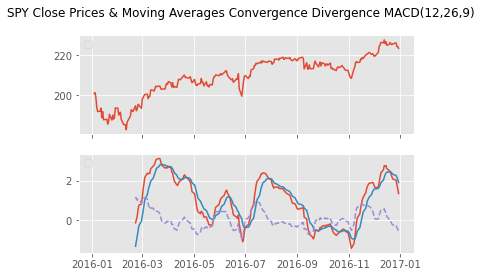

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


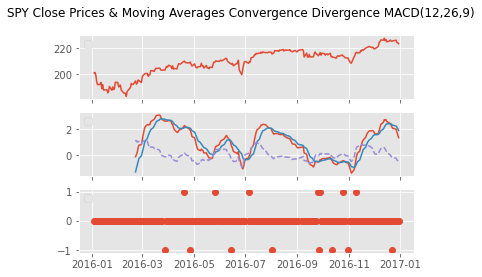

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


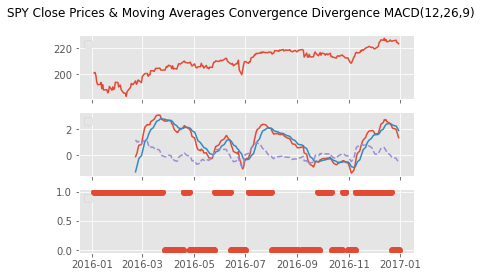

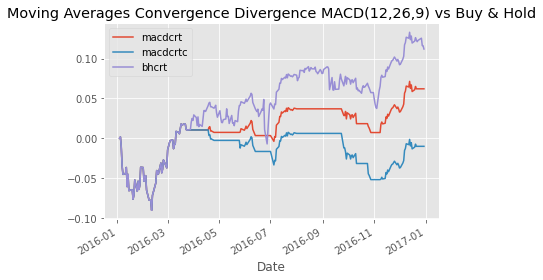

In [22]:
# Data Downloading or Reading

# Google Finance
# No Adjusted Close Prices
# spy = web.DataReader('SPY', data_source ='google', start = '2016-01-01',end = '2017-01-01')
# spy['Adj Close'] = spy['Close']

# Yahoo Finance
spy = web.DataReader('SPY', 'yahoo', '2016-01-01', '2017-01-01')

# Data Reading
spy = pd.read_csv("/home/gordon/work/builds/resources/Stock-Technical-Analysis-Data.txt", index_col='Date', parse_dates=True)


##########

# 2. Moving Averages Convergence Divergence MACD(12,26,9) Calculation and Chart

# Technical Indicator Calculation
spy['macd'], spy['macdema'], spy['macdhist'] = ta.MACD(np.asarray(spy['Close']),
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 3. Signal Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['macd(-1)'] = spy['macd'].shift(1)
spy['macdema(-1)'] = spy['macdema'].shift(1)
spy['macd(-2)'] = spy['macd'].shift(2)
spy['macdema(-2)'] = spy['macdema'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['macdsig'] = 0
macdsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    spy.iloc[i, 13] = macdsig
# Trading Strategy Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdsig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 4. Signal Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['macdstr'] = 1
macdstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macdsig'] == 1:
        macdstr = 1
    elif r[1]['macdsig'] == -1:
        macdstr = 0
    else:
        macdstr = spy['macdstr'][i-1]
    spy.iloc[i, 14] = macdstr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdstr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 5. Signal Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Signal Crossover Strategy Without Trading Commissions
spy['macddrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['macdstr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['macdstr(-1)'] = spy['macdstr'].shift(1)
spy['macdtc'] = spy['macdsig']
macdtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['macdsig'] == 1 or r[1]['macdsig'] == -1) and r[1]['macdstr'] != r[1]['macdstr(-1)']:
        macdtc = 0.01
    else:
        macdtc = 0.00
    spy.iloc[i, 17] = macdtc
spy['macddrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['macdtc'])*spy['macdstr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['macdcrt'] = np.cumprod(spy['macddrt']+1)-1
spy['macdcrtc'] = np.cumprod(spy['macddrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['macdcrt', 'macdcrtc', 'bhcrt'])
plt.title('Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
macdyrt = spy.iloc[251, 20]
macdyrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
macdstd = np.std(spy['macddrt'])*np.sqrt(252)
macdstdc = np.std(spy['macddrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
macdsr = macdyrt/macdstd
macdsrc = macdyrtc/macdstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'MACD(12,26,9)', '2': 'MACD(12,26,9)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': macdyrt, '2': macdyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': macdstd, '2': macdstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': macdsr, '2': macdsrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


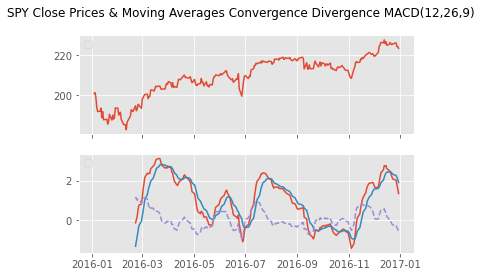

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


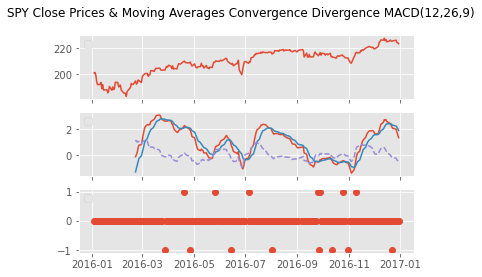

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


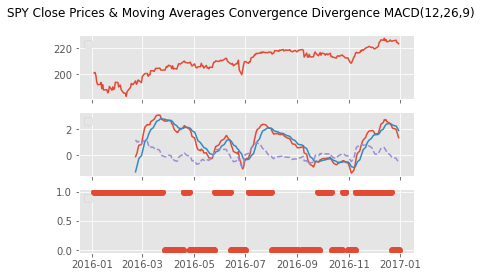

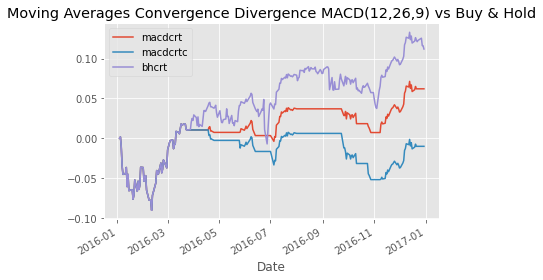

In [23]:
# 1. Packages and Data

# Packages Importing
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import talib as ta

# Data Downloading or Reading

# Google Finance
# No Adjusted Close Prices
# spy = web.DataReader('SPY', 'google', '2016-01-01', '2017-01-01')
# spy['Adj Close'] = spy['Close']

# Yahoo Finance
# spy = web.DataReader('SPY', 'yahoo', '2016-01-01', '2017-01-01')

# Data Reading
spy = pd.read_csv("/home/gordon/work/builds/resources/Stock-Technical-Analysis-Data.txt", index_col='Date', parse_dates=True)

##########

# 2. Moving Averages Convergence Divergence MACD(12,26,9) Calculation and Chart

# Technical Indicator Calculation
spy['macd'], spy['macdema'], spy['macdhist'] = ta.MACD(np.asarray(spy['Close']),
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 3. Signal Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['macd(-1)'] = spy['macd'].shift(1)
spy['macdema(-1)'] = spy['macdema'].shift(1)
spy['macd(-2)'] = spy['macd'].shift(2)
spy['macdema(-2)'] = spy['macdema'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['macdsig'] = 0
macdsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    spy.iloc[i, 13] = macdsig
# Trading Strategy Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdsig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 4. Signal Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['macdstr'] = 1
macdstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macdsig'] == 1:
        macdstr = 1
    elif r[1]['macdsig'] == -1:
        macdstr = 0
    else:
        macdstr = spy['macdstr'][i-1]
    spy.iloc[i, 14] = macdstr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdstr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 5. Signal Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Signal Crossover Strategy Without Trading Commissions
spy['macddrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['macdstr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['macdstr(-1)'] = spy['macdstr'].shift(1)
spy['macdtc'] = spy['macdsig']
macdtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['macdsig'] == 1 or r[1]['macdsig'] == -1) and r[1]['macdstr'] != r[1]['macdstr(-1)']:
        macdtc = 0.01
    else:
        macdtc = 0.00
    spy.iloc[i, 17] = macdtc
spy['macddrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['macdtc'])*spy['macdstr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['macdcrt'] = np.cumprod(spy['macddrt']+1)-1
spy['macdcrtc'] = np.cumprod(spy['macddrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['macdcrt', 'macdcrtc', 'bhcrt'])
plt.title('Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
macdyrt = spy.iloc[251, 20]
macdyrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
macdstd = np.std(spy['macddrt'])*np.sqrt(252)
macdstdc = np.std(spy['macddrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
macdsr = macdyrt/macdstd
macdsrc = macdyrtc/macdstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'MACD(12,26,9)', '2': 'MACD(12,26,9)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': macdyrt, '2': macdyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': macdstd, '2': macdstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': macdsr, '2': macdsrc, '3': bhsr}]
table = pd.DataFrame(data);

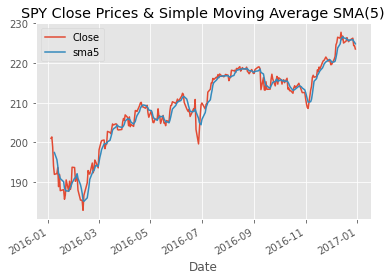

No handles with labels found to put in legend.
No handles with labels found to put in legend.


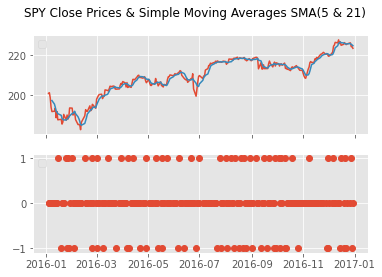

No handles with labels found to put in legend.
No handles with labels found to put in legend.


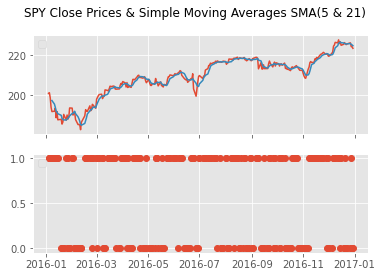

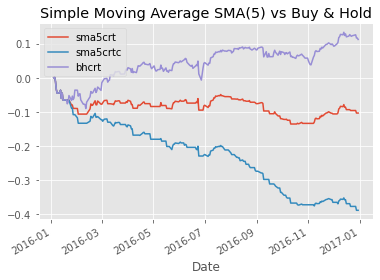

In [21]:
# 1. Packages and Data

# Packages Importing
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import talib as ta

# Data Downloading or Reading

# Google Finance
# No Adjusted Close Prices
# spy = web.DataReader('SPY', 'google', '2016-01-01', '2017-01-01')
# spy['Adj Close'] = spy['Close']

# Yahoo Finance
# spy = web.DataReader('SPY', 'yahoo', '2016-01-01', '2017-01-01')

# Data Reading
spy = pd.read_csv("/home/gordon/work/builds/resources/Stock-Technical-Analysis-Data.txt", index_col='Date', parse_dates=True)

##########

# 2. Simple Moving Average SMA(5) Calculation and Chart
# Technical Indicator Calculation
spy['sma5'] = ta.SMA(np.asarray(spy['Close']), 5)
# Technical Indicator Chart
spy.plot(y=['Close', 'sma5'])
plt.title('SPY Close Prices & Simple Moving Average SMA(5)')
plt.legend(loc='upper left')
plt.show()

##########

# 3. Price Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['sma5(-1)'] = spy['sma5'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['sma5(-2)'] = spy['sma5'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['sma5sig'] = 0
sma5sig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)']:
        sma5sig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)']:
        sma5sig = -1
    else:
        sma5sig = 0
    spy.iloc[i, 11] = sma5sig
# Trading Signals Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['sma5sig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Simple Moving Averages SMA(5 & 21)')
plt.show()

##########

# 4. Price Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['sma5str'] = 1
sma5str = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['sma5sig'] == 1:
        sma5str = 1
    elif r[1]['sma5sig'] == -1:
        sma5str = 0
    else:
        sma5str = spy['sma5str'][i-1]
    spy.iloc[i, 12] = sma5str
# Trading Strategy Chart
fig2, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['sma5str'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Simple Moving Averages SMA(5 & 21)')
plt.show()

##########

# 5. Price Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Price Crossover Strategy Without Trading Commissions
spy['sma5drt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['sma5str']
spy.iloc[0, 13] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['sma5str(-1)'] = spy['sma5str'].shift(1)
spy['sma5tc'] = spy['sma5sig']
sma5tc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['sma5sig'] == 1 or r[1]['sma5sig'] == -1) and r[1]['sma5str'] != r[1]['sma5str(-1)']:
        sma5tc = 0.01
    else:
        sma5tc = 0.00
    spy.iloc[i, 15] = sma5tc
spy['sma5drtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['sma5tc'])*spy['sma5str']
spy.iloc[0, 16] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 17] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['sma5crt'] = np.cumprod(spy['sma5drt']+1)-1
spy['sma5crtc'] = np.cumprod(spy['sma5drtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['sma5crt', 'sma5crtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
sma5yrt = spy.iloc[251, 18]
sma5yrtc = spy.iloc[251, 19]
bhyrt = spy.iloc[251, 20]
# Annualized Standard Deviation
sma5std = np.std(spy['sma5drt'])*np.sqrt(252)
sma5stdc = np.std(spy['sma5drtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
sma5sr = sma5yrt/sma5std
sma5src = sma5yrtc/sma5stdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5)', '2': 'SMA(5)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': sma5yrt, '2': sma5yrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': sma5std, '2': sma5stdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': sma5sr, '2': sma5src, '3': bhsr}]
table = pd.DataFrame(data);
# print(spy)
# print(table)

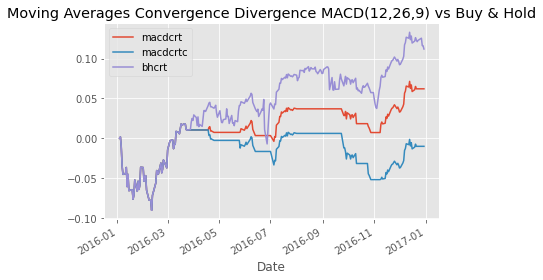

In [18]:


##########

# 5. Signal Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Signal Crossover Strategy Without Trading Commissions
spy['macddrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['macdstr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['macdstr(-1)'] = spy['macdstr'].shift(1)
spy['macdtc'] = spy['macdsig']
macdtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['macdsig'] == 1 or r[1]['macdsig'] == -1) and r[1]['macdstr'] != r[1]['macdstr(-1)']:
        macdtc = 0.01
    else:
        macdtc = 0.00
    spy.iloc[i, 17] = macdtc
spy['macddrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['macdtc'])*spy['macdstr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['macdcrt'] = np.cumprod(spy['macddrt']+1)-1
spy['macdcrtc'] = np.cumprod(spy['macddrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['macdcrt', 'macdcrtc', 'bhcrt'])
plt.title('Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
macdyrt = spy.iloc[251, 20]
macdyrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
macdstd = np.std(spy['macddrt'])*np.sqrt(252)
macdstdc = np.std(spy['macddrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
macdsr = macdyrt/macdstd
macdsrc = macdyrtc/macdstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'MACD(12,26,9)', '2': 'MACD(12,26,9)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': macdyrt, '2': macdyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': macdstd, '2': macdstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': macdsr, '2': macdsrc, '3': bhsr}]
table = pd.DataFrame(data);
# print(spy)
# print(table)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


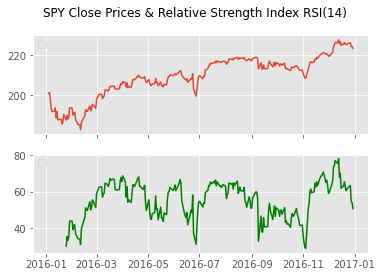

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


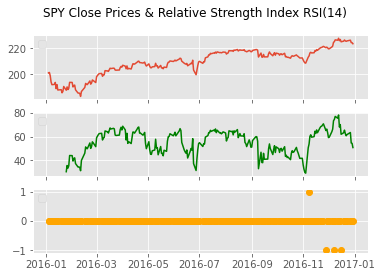

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


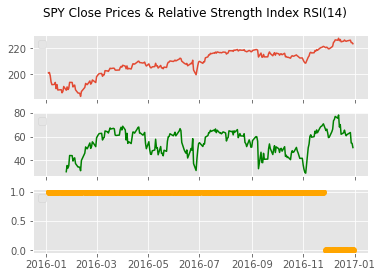

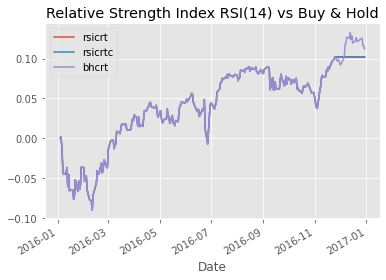

In [26]:
# 1. Packages and Data

# Packages Importing
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import talib as ta

# Data Downloading or Reading

# Google Finance
# No Adjusted Close Prices
# spy = web.DataReader('SPY', 'google', '2016-01-01', '2017-01-01')
# spy['Adj Close'] = spy['Close']

# Yahoo Finance
# spy = web.DataReader('SPY', 'yahoo', '2016-01-01', '2017-01-01')

# Data Reading
spy = pd.read_csv("/home/gordon/work/builds/resources/Stock-Technical-Analysis-Data.txt", index_col='Date', parse_dates=True)

##########

# 2. Relative Strength Index RSI(14) Calculation and Chart
# Technical Indicator Calculation
spy['rsi'] = ta.RSI(np.asarray(spy['Close']), timeperiod=14)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['rsi'], color='green')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Relative Strength Index RSI(14)')
plt.show()

##########

# 3. Bands Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
spy['rsi(-1)'] = spy['rsi'].shift(1)
spy['rsi(-2)'] = spy['rsi'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['rsisig'] = 0
rsisig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['rsi(-2)'] < 30 and r[1]['rsi(-1)'] > 30:
        rsisig = 1
    elif r[1]['rsi(-2)'] < 70 and r[1]['rsi(-1)'] > 70:
        rsisig = -1
    else:
        rsisig = 0
    spy.iloc[i, 9] = rsisig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['rsi'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rsisig'], marker='o', linestyle='', color='orange')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Relative Strength Index RSI(14)')
plt.show()

##########

# 4. Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['rsistr'] = 1
rsistr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['rsisig'] == 1:
        rsistr = 1
    elif r[1]['rsisig'] == -1:
        rsistr = 0
    else:
        rsistr = spy['rsistr'][i-1]
    spy.iloc[i, 10] = rsistr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['rsi'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rsistr'], marker='o', linestyle='', color='orange')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Relative Strength Index RSI(14)')
plt.show()

##########

# 5. Bands Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Price Crossover Strategy Without Trading Commissions
spy['rsidrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['rsistr']
spy.iloc[0, 11] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['rsistr(-1)'] = spy['rsistr'].shift(1)
spy['rsitc'] = spy['rsisig']
rsitc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['rsisig'] == 1 or r[1]['rsisig'] == -1) and r[1]['rsistr'] != r[1]['rsistr(-1)']:
        rsitc = 0.01
    else:
        rsitc = 0.00
    spy.iloc[i, 13] = rsitc
spy['rsidrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['rsitc'])*spy['rsistr']
spy.iloc[0, 14] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 15] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['rsicrt'] = np.cumprod(spy['rsidrt']+1)-1
spy['rsicrtc'] = np.cumprod(spy['rsidrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['rsicrt', 'rsicrtc', 'bhcrt'])
plt.title('Relative Strength Index RSI(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
rsiyrt = spy.iloc[251, 16]
rsiyrtc = spy.iloc[251, 17]
bhyrt = spy.iloc[251, 18]
# Annualized Standard Deviation
rsistd = np.std(spy['rsidrt'])*np.sqrt(252)
rsistdc = np.std(spy['rsidrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
rsisr = rsiyrt/rsistd
rsisrc = rsiyrtc/rsistdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'RSI(14)', '2': 'RSI(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': rsiyrt, '2': rsiyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rsistd, '2': rsistdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rsisr, '2': rsisrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


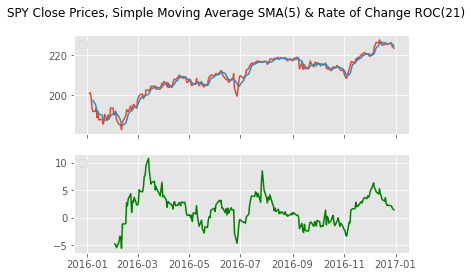

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


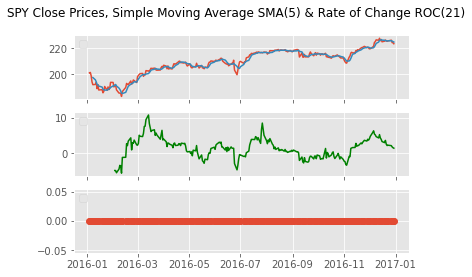

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


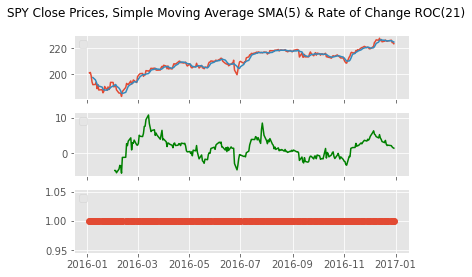

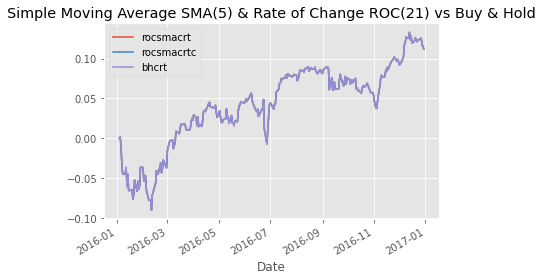

In [28]:
#  1. Packages and Data

# Packages Importing
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import talib as ta

# Data Downloading or Reading

# Google Finance
# No Adjusted Close Prices
# spy = web.DataReader('SPY', 'google', '2016-01-01', '2017-01-01')
# spy['Adj Close'] = spy['Close']

# Yahoo Finance
# spy = web.DataReader('SPY', 'yahoo', '2016-01-01', '2017-01-01')

# Data Reading
spy = pd.read_csv("/home/gordon/work/builds/resources/Stock-Technical-Analysis-Data.txt",
 index_col='Date', parse_dates=True)

##########

# 2. Simple Moving Average SMA(5) and Rate of Change ROC(21) Calculation and Chart
# Technical Indicators Calculation
spy['sma5'] = ta.SMA(np.asarray(spy['Close']), 5)
spy['roc'] = ta.ROC(np.asarray(spy['Close']), timeperiod=21)
# Technical Indicators Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 3. Price and Bands Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['sma5(-1)'] = spy['sma5'].shift(1)
spy['roc(-1)'] = spy['roc'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['sma5(-2)'] = spy['sma5'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['rocsmasig'] = 0
rocsmasig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['roc(-1)'] < -10:
        rocsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['roc(-1)'] > 10:
        rocsmasig = -1
    else:
        rocsmasig = 0
    spy.iloc[i, 13] = rocsmasig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rocsmasig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 4. Price and Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['rocsmastr'] = 1
rocsmastr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['rocsmasig'] == 1:
        rocsmastr = 1
    elif r[1]['rocsmasig'] == -1:
        rocsmastr = 0
    else:
        rocsmastr = spy['rocsmastr'][i-1]
    spy.iloc[i, 14] = rocsmastr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rocsmastr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 5. Price and Bands Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Price and Bands Crossover Strategy Without Trading Commissions
spy['rocsmadrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['rocsmastr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['rocsmastr(-1)'] = spy['rocsmastr'].shift(1)
spy['rocsmatc'] = spy['rocsmasig']
rocsmatc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['rocsmasig'] == 1 or r[1]['rocsmasig'] == -1) and r[1]['rocsmastr'] != r[1]['rocsmastr(-1)']:
        rocsmatc = 0.01
    else:
        rocsmatc = 0.00
    spy.iloc[i, 17] = rocsmatc
spy['rocsmadrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['rocsmatc'])*spy['rocsmastr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['rocsmacrt'] = np.cumprod(spy['rocsmadrt']+1)-1
spy['rocsmacrtc'] = np.cumprod(spy['rocsmadrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['rocsmacrt', 'rocsmacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
rocsmayrt = spy.iloc[251, 20]
rocsmayrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
rocsmastd = np.std(spy['rocsmadrt'])*np.sqrt(252)
rocsmastdc = np.std(spy['rocsmadrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
rocsmasr = rocsmayrt/rocsmastd
rocsmasrc = rocsmayrtc/rocsmastdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'ROC(21)', '2': 'ROC(21)TC', '3': ''},
        {'0': 'Annualized Return', '1': rocsmayrt, '2': rocsmayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rocsmastd, '2': rocsmastdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rocsmasr, '2': rocsmasrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


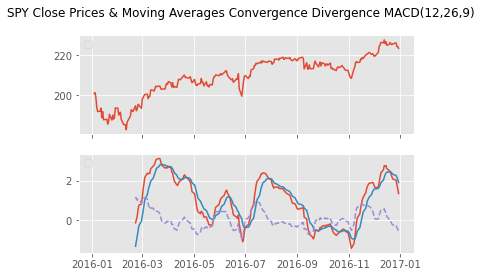

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


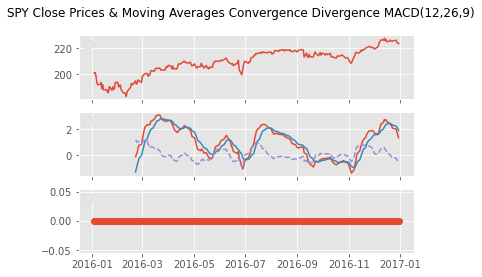

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


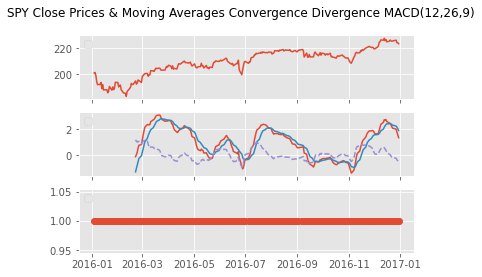

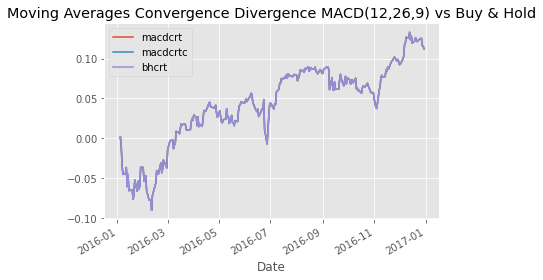

In [30]:
#  2. Moving Averages Convergence Divergence MACD(12,26,9) Calculation and Chart

# Technical Indicator Calculation
spy['macd'], spy['macdema'], spy['macdhist'] = ta.MACD(np.asarray(spy['Close']),
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 3. Signal Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['macd(-1)'] = spy['macd'].shift(1)
spy['macdema(-1)'] = spy['macdema'].shift(1)
spy['macd(-2)'] = spy['macd'].shift(2)
spy['macdema(-2)'] = spy['macdema'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['macdsig'] = 0
macdsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    spy.iloc[i, 13] = macdsig
# Trading Strategy Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdsig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 4. Signal Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['macdstr'] = 1
macdstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['macdsig'] == 1:
        macdstr = 1
    elif r[1]['macdsig'] == -1:
        macdstr = 0
    else:
        macdstr = spy['macdstr'][i-1]
    spy.iloc[i, 14] = macdstr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['macd'])
ax[1].plot(spy['macdema'])
ax[1].plot(spy['macdhist'], linestyle='--')
ax[1].legend(loc='upper left')
ax[2].plot(spy['macdstr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.show()

##########

# 5. Signal Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Signal Crossover Strategy Without Trading Commissions
spy['macddrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['macdstr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['macdstr(-1)'] = spy['macdstr'].shift(1)
spy['macdtc'] = spy['macdsig']
macdtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['macdsig'] == 1 or r[1]['macdsig'] == -1) and r[1]['macdstr'] != r[1]['macdstr(-1)']:
        macdtc = 0.01
    else:
        macdtc = 0.00
    spy.iloc[i, 17] = macdtc
spy['macddrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['macdtc'])*spy['macdstr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['macdcrt'] = np.cumprod(spy['macddrt']+1)-1
spy['macdcrtc'] = np.cumprod(spy['macddrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['macdcrt', 'macdcrtc', 'bhcrt'])
plt.title('Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
macdyrt = spy.iloc[251, 20]
macdyrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
macdstd = np.std(spy['macddrt'])*np.sqrt(252)
macdstdc = np.std(spy['macddrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
macdsr = macdyrt/macdstd
macdsrc = macdyrtc/macdstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'MACD(12,26,9)', '2': 'MACD(12,26,9)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': macdyrt, '2': macdyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': macdstd, '2': macdstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': macdsr, '2': macdsrc, '3': bhsr}]
table = pd.DataFrame(data);

Text(0.5, 1.0, 'SPY Close Prices & Bollinger Bands BB(20,2)')

No handles with labels found to put in legend.


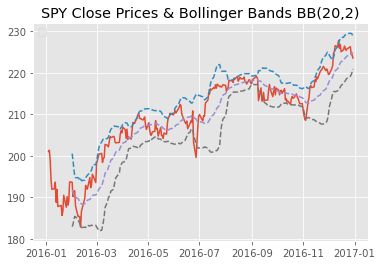

No handles with labels found to put in legend.


No handles with labels found to put in legend.


Text(0.5, 0.98, 'SPY Close Prices & Bollinger Bands BB(20,2)')

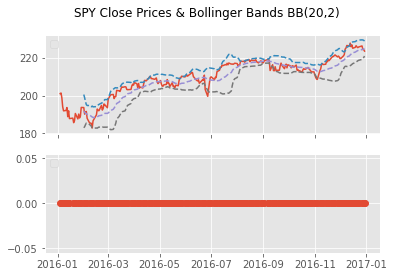

No handles with labels found to put in legend.


No handles with labels found to put in legend.


Text(0.5, 0.98, 'SPY Close Prices & Bollinger Bands BB(20,2)')

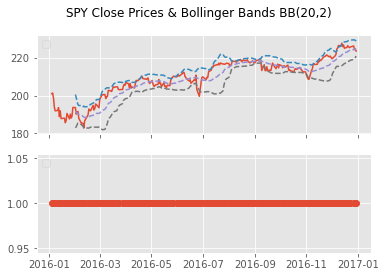

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Bollinger Bands BB(20,2) vs Buy & Hold')

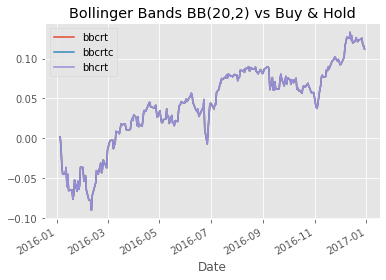

In [31]:
# 2. Bollinger Bands BB(20,2) Calculation and Chart

# Technical Indicator Calculation
spy['upper'], spy['middle'], spy['lower'] = ta.BBANDS(np.asarray(spy['Close']),
                                                     timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# Technical Indicator Chart
fig1, ax = plt.subplots()
ax.plot(spy['Close'])
ax.plot(spy['upper'], linestyle='--')
ax.plot(spy['middle'], linestyle='--')
ax.plot(spy['lower'], linestyle='--')
plt.title('SPY Close Prices & Bollinger Bands BB(20,2)')
plt.legend(loc='upper left')
plt.show()

##########

# 3. Bands Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['lower(-1)'] = spy['lower'].shift(1)
spy['upper(-1)'] = spy['upper'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['lower(-2)'] = spy['lower'].shift(2)
spy['upper(-2)'] = spy['upper'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['bbsig'] = 0
bbsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    elif r[1]['Close(-2)'] < r[1]['upper(-2)'] and r[1]['Close(-1)'] > r[1]['upper(-1)']:
        bbsig = -1
    else:
        bbsig = 0
    spy.iloc[i, 15] = bbsig
# Trading Signals Chart
fig2, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['upper'], linestyle='--')
ax[0].plot(spy['middle'], linestyle='--')
ax[0].plot(spy['lower'], linestyle='--')
ax[0].legend(loc='upper left')
ax[1].plot(spy['bbsig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Bollinger Bands BB(20,2)')
plt.show()

##########

# 4. Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['bbstr'] = 1
bbstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['bbsig'] == 1:
        bbstr = 1
    elif r[1]['bbsig'] == -1:
        bbstr = 0
    else:
        bbstr = spy['bbstr'][i-1]
    spy.iloc[i, 16] = bbstr
# Trading Strategy Chart
fig3, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['upper'], linestyle='--')
ax[0].plot(spy['middle'], linestyle='--')
ax[0].plot(spy['lower'], linestyle='--')
ax[0].legend(loc='upper left')
ax[1].plot(spy['bbstr'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Bollinger Bands BB(20,2)')
plt.show()

##########

# 5. Bands Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Bands Crossover Strategy Without Trading Commissions
spy['bbdrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['bbstr']
spy.iloc[0, 17] = 0
# Bands Crossover Strategy With Trading Commissions (1% Per Trade)
spy['bbstr(-1)'] = spy['bbstr'].shift(1)
spy['bbtc'] = spy['bbsig']
bbtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['bbsig'] == 1 or r[1]['bbsig'] == -1) and r[1]['bbstr'] != r[1]['bbstr(-1)']:
        bbtc = 0.01
    else:
        bbtc = 0.00
    spy.iloc[i, 19] = bbtc
spy['bbdrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['bbtc'])*spy['bbstr']
spy.iloc[0, 20] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 21] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['bbcrt'] = np.cumprod(spy['bbdrt']+1)-1
spy['bbcrtc'] = np.cumprod(spy['bbdrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['bbcrt', 'bbcrtc', 'bhcrt'])
plt.title('Bollinger Bands BB(20,2) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
bbyrt = spy.iloc[251, 22]
bbyrtc = spy.iloc[251, 23]
bhyrt = spy.iloc[251, 24]
# Annualized Standard Deviation
bbstd = np.std(spy['bbdrt'])*np.sqrt(252)
bbstdc = np.std(spy['bbdrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
bbsr = bbyrt/bbstd
bbsrc = bbyrtc/bbstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'BB(20,2)', '2': 'BB(20,2)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': bbyrt, '2': bbyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': bbstd, '2': bbstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': bbsr, '2': bbsrc, '3': bhsr}]
table = pd.DataFrame(data)

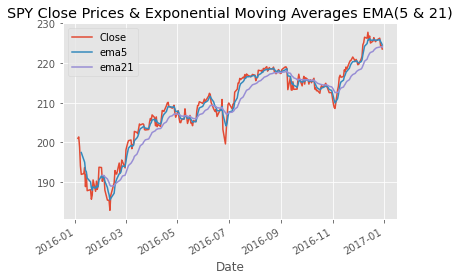

No handles with labels found to put in legend.
No handles with labels found to put in legend.


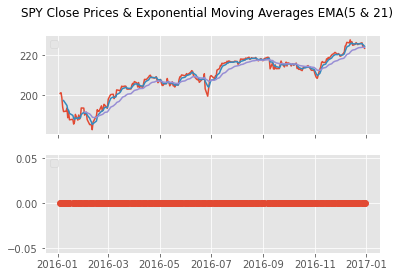

No handles with labels found to put in legend.
No handles with labels found to put in legend.


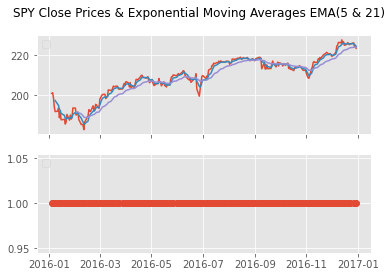

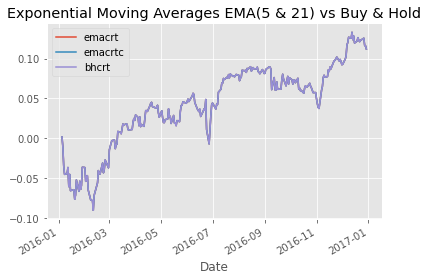

In [32]:
# 2. Exponential Moving Averages EMA(5 & 21) Calculation and Chart

# Technical Indicator Calculation
spy['ema5'] = ta.EMA(np.asarray(spy['Close']), 5)
spy['ema21'] = ta.EMA(np.asarray(spy['Close']), 21)
# Technical Indicator Chart
spy.plot(y=['Close', 'ema5', 'ema21'])
plt.title('SPY Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.legend(loc='upper left')
plt.show()

##########

# 3. Double Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
spy['ema5(-1)'] = spy['ema5'].shift(1)
spy['ema21(-1)'] = spy['ema21'].shift(1)
spy['ema5(-2)'] = spy['ema5'].shift(2)
spy['ema21(-2)'] = spy['ema21'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['emasig'] = 0
emasig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['ema5(-2)'] < r[1]['ema21(-2)'] and r[1]['ema5(-1)'] > r[1]['ema21(-1)']:
        emasig = 1
    elif r[1]['ema5(-2)'] > r[1]['ema21(-2)'] and r[1]['ema5(-1)'] < r[1]['ema21(-1)']:
        emasig = -1
    else:
        emasig = 0
    spy.iloc[i, 12] = emasig
# Trading Signals Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['ema5'])
ax[0].plot(spy['ema21'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['emasig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.show()

##########

# 4. Double Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['emastr'] = 1
emastr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['emasig'] == 1:
        emastr = 1
    elif r[1]['emasig'] == -1:
        emastr = 0
    else:
        emastr = spy['emastr'][i-1]
    spy.iloc[i, 13] = emastr
# Trading Strategy Chart
fig2, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['ema5'])
ax[0].plot(spy['ema21'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['emastr'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.show()

##########

# 5. Double Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Double Crossover Strategy Without Trading Commissions
spy['emadrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['emastr']
spy.iloc[0, 14] = 0
# Double Crossover Strategy With Trading Commissions (1% Per Trade)
spy['emastr(-1)'] = spy['emastr'].shift(1)
spy['ematc'] = spy['emasig']
ematc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['emasig'] == 1 or r[1]['emasig'] == -1) and r[1]['emastr'] != r[1]['emastr(-1)']:
        ematc = 0.01
    else:
        ematc = 0.00
    spy.iloc[i, 16] = ematc
spy['emadrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['ematc'])*spy['emastr']
spy.iloc[0, 17] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 18] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['emacrt'] = np.cumprod(spy['emadrt']+1)-1
spy['emacrtc'] = np.cumprod(spy['emadrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['emacrt', 'emacrtc', 'bhcrt'])
plt.title('Exponential Moving Averages EMA(5 & 21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
emayrt = spy.iloc[251, 19]
emayrtc = spy.iloc[251, 20]
bhyrt = spy.iloc[251, 21]
# Annualized Standard Deviation
emastd = np.std(spy['emadrt'])*np.sqrt(252)
emastdc = np.std(spy['emadrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
emasr = emayrt/emastd
emasrc = emayrtc/emastdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'EMA(5 & 21)', '2': 'EMA(5 & 21)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': emayrt, '2': emayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': emastd, '2': emastdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': emasr, '2': emasrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


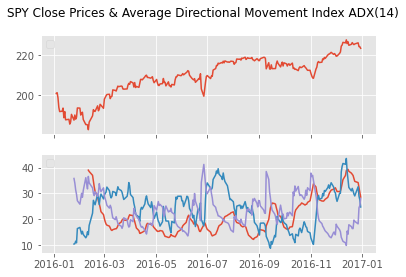

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


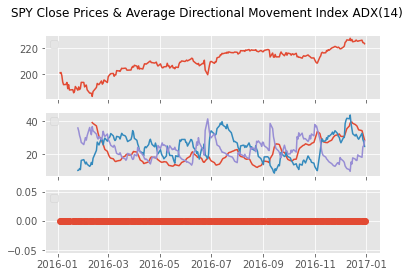

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


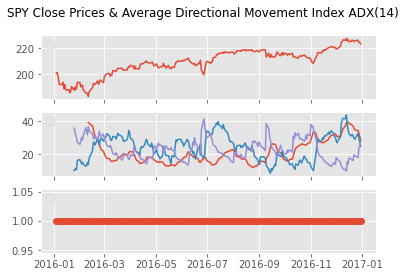

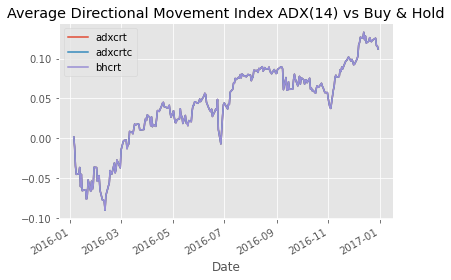

In [33]:
# 2. Average Directional Movement Index ADX(14) Calculation and Chart

# Technical Indicator Calculation
spy['adx'] = ta.ADX(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
spy['+di'] = ta.PLUS_DI(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
spy['-di'] = ta.MINUS_DI(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 3. Bands and Double Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
spy['adx(-1)'] = spy['adx'].shift(1)
spy['+di(-1)'] = spy['+di'].shift(1)
spy['-di(-1)'] = spy['-di'].shift(1)
spy['+di(-2)'] = spy['+di'].shift(2)
spy['-di(-2)'] = spy['-di'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['adxsig'] = 0
adxsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)'] < r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = -1
    else:
        adxsig = 0
        spy.iloc[i, 14] = adxsig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
ax[2].plot(spy['adxsig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 4. Bands and Double Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['adxstr'] = 1
adxstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['adxsig'] == 1:
        adxstr = 1
    elif r[1]['adxsig'] == -1:
        adxstr = 0
    else:
        adxstr = spy['adxstr'][i-1]
    spy.iloc[i, 15] = adxstr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
ax[2].plot(spy['adxstr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 5. Bands and Double Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Bands and Double Crossover Strategy Without Trading Commissions
spy['adxdrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['adxstr']
spy.iloc[0, 16] = 0
# Bands and Double Crossover Strategy With Trading Commissions (1% Per Trade)
spy['adxstr(-1)'] = spy['adxstr'].shift(1)
spy['adxtc'] = spy['adxsig']
adxtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['adxsig'] == 1 or r[1]['adxsig'] == -1) and r[1]['adxstr'] != r[1]['adxstr(-1)']:
        adxtc = 0.01
    else:
        adxtc = 0.00
    spy.iloc[i, 18] = adxtc
spy['adxdrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['adxtc'])*spy['adxstr']
spy.iloc[0, 19] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 20] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['adxcrt'] = np.cumprod(spy['adxdrt']+1)-1
spy['adxcrtc'] = np.cumprod(spy['adxdrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['adxcrt', 'adxcrtc', 'bhcrt'])
plt.title('Average Directional Movement Index ADX(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
adxyrt = spy.iloc[251, 21]
adxyrtc = spy.iloc[251, 22]
bhyrt = spy.iloc[251, 23]
# Annualized Standard Deviation
adxstd = np.std(spy['adxdrt'])*np.sqrt(252)
adxstdc = np.std(spy['adxdrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
adxsr = adxyrt/adxstd
adxsrc = adxyrtc/adxstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'ADX(14)', '2': 'ADX(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': adxyrt, '2': adxyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': adxstd, '2': adxstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': adxsr, '2': adxsrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


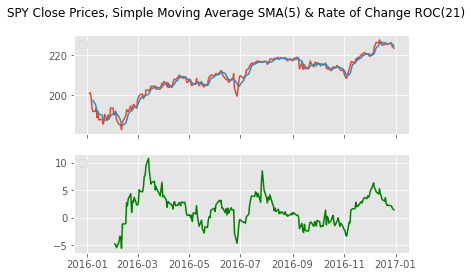

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


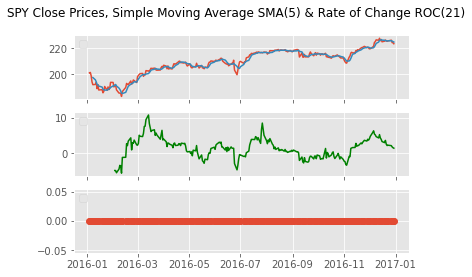

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


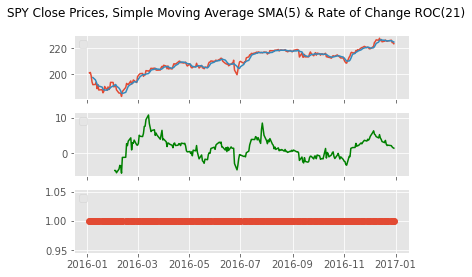

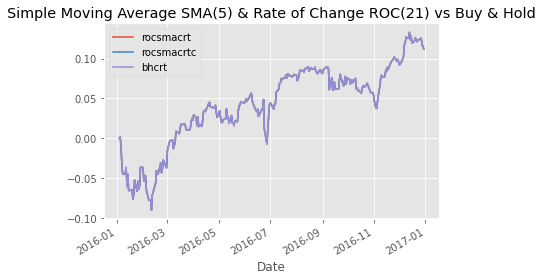

In [35]:
# 2. Simple Moving Average SMA(5) and Rate of Change ROC(21) Calculation and Chart
# Technical Indicators Calculation
spy['sma5'] = ta.SMA(np.asarray(spy['Close']), 5)
spy['roc'] = ta.ROC(np.asarray(spy['Close']), timeperiod=21)
# Technical Indicators Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 3. Price and Bands Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['sma5(-1)'] = spy['sma5'].shift(1)
spy['roc(-1)'] = spy['roc'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['sma5(-2)'] = spy['sma5'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['rocsmasig'] = 0
rocsmasig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['roc(-1)'] < -10:
        rocsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['roc(-1)'] > 10:
        rocsmasig = -1
    else:
        rocsmasig = 0
    spy.iloc[i, 13] = rocsmasig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rocsmasig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 4. Price and Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['rocsmastr'] = 1
rocsmastr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['rocsmasig'] == 1:
        rocsmastr = 1
    elif r[1]['rocsmasig'] == -1:
        rocsmastr = 0
    else:
        rocsmastr = spy['rocsmastr'][i-1]
    spy.iloc[i, 14] = rocsmastr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].plot(spy['sma5'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['roc'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['rocsmastr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.show()

##########

# 5. Price and Bands Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Price and Bands Crossover Strategy Without Trading Commissions
spy['rocsmadrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['rocsmastr']
spy.iloc[0, 15] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['rocsmastr(-1)'] = spy['rocsmastr'].shift(1)
spy['rocsmatc'] = spy['rocsmasig']
rocsmatc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['rocsmasig'] == 1 or r[1]['rocsmasig'] == -1) and r[1]['rocsmastr'] != r[1]['rocsmastr(-1)']:
        rocsmatc = 0.01
    else:
        rocsmatc = 0.00
    spy.iloc[i, 17] = rocsmatc
spy['rocsmadrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['rocsmatc'])*spy['rocsmastr']
spy.iloc[0, 18] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 19] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['rocsmacrt'] = np.cumprod(spy['rocsmadrt']+1)-1
spy['rocsmacrtc'] = np.cumprod(spy['rocsmadrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['rocsmacrt', 'rocsmacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
rocsmayrt = spy.iloc[251, 20]
rocsmayrtc = spy.iloc[251, 21]
bhyrt = spy.iloc[251, 22]
# Annualized Standard Deviation
rocsmastd = np.std(spy['rocsmadrt'])*np.sqrt(252)
rocsmastdc = np.std(spy['rocsmadrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
rocsmasr = rocsmayrt/rocsmastd
rocsmasrc = rocsmayrtc/rocsmastdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'ROC(21)', '2': 'ROC(21)TC', '3': ''},
        {'0': 'Annualized Return', '1': rocsmayrt, '2': rocsmayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rocsmastd, '2': rocsmastdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rocsmasr, '2': rocsmasrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


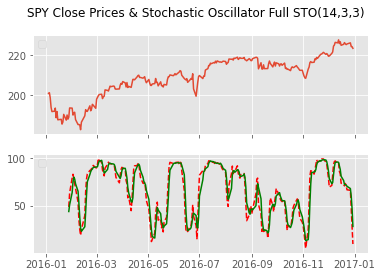

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


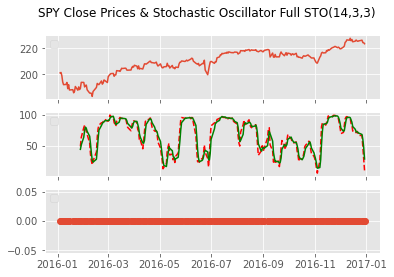

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


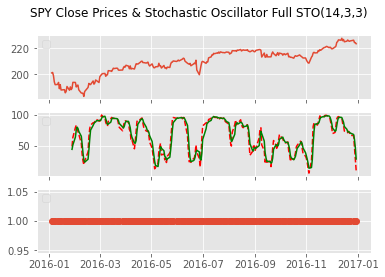

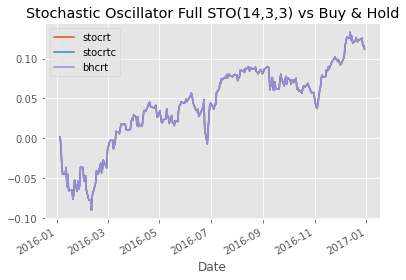

In [37]:
#  2. Stochastic Oscillator Full STO(14,3,3) Calculation and Chart
# Technical Indicator Calculation
spy['slowk'], spy['slowd'] = ta.STOCH(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']),
                                     fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['slowk'], color='red', linestyle='--')
ax[1].plot(spy['slowd'], color='green')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.show()

##########

# 3. Bands Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['slowd(-1)'] = spy['slowd'].shift(1)
spy['slowd(-2)'] = spy['slowd'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['stosig'] = 0
stosig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['slowd(-2)'] < 20 and r[1]['slowd(-1)'] > 20:
        stosig = 1
    elif r[1]['slowd(-2)'] < 80 and r[1]['slowd(-1)'] > 80:
        stosig = -1
    else:
        stosig = 0
    spy.iloc[i, 10] = stosig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['slowk'], color='red', linestyle='--')
ax[1].plot(spy['slowd'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['stosig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.show()

##########

# 4. Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['stostr'] = 1
stostr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['stosig'] == 1:
        stostr = 1
    elif r[1]['stosig'] == -1:
        stostr = 0
    else:
        stostr = spy['stostr'][i-1]
    spy.iloc[i, 11] = stostr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['slowk'], color='red', linestyle='--')
ax[1].plot(spy['slowd'], color='green')
ax[1].legend(loc='upper left')
ax[2].plot(spy['stostr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.show()

##########

# 5. Bands Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Price Crossover Strategy Without Trading Commissions
spy['stodrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['stostr']
spy.iloc[0, 12] = 0
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['stostr(-1)'] = spy['stostr'].shift(1)
spy['stotc'] = spy['stosig']
stotc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['stosig'] == 1 or r[1]['stosig'] == -1) and r[1]['stostr'] != r[1]['stostr(-1)']:
        stotc = 0.01
    else:
        stotc = 0.00
    spy.iloc[i, 14] = stotc
spy['stodrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['stotc'])*spy['stostr']
spy.iloc[0, 15] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 16] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['stocrt'] = np.cumprod(spy['stodrt']+1)-1
spy['stocrtc'] = np.cumprod(spy['stodrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['stocrt', 'stocrtc', 'bhcrt'])
plt.title('Stochastic Oscillator Full STO(14,3,3) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
stoyrt = spy.iloc[251, 17]
stoyrtc = spy.iloc[251, 18]
bhyrt = spy.iloc[251, 19]
# Annualized Standard Deviation
stostd = np.std(spy['stodrt'])*np.sqrt(252)
stostdc = np.std(spy['stodrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
stosr = stoyrt/stostd
stosrc = stoyrtc/stostdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'STO(14,3,3)', '2': 'STO(14,3,3)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': stoyrt, '2': stoyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': stostd, '2': stostdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': stosr, '2': stosrc, '3': bhsr}]
table = pd.DataFrame(data);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


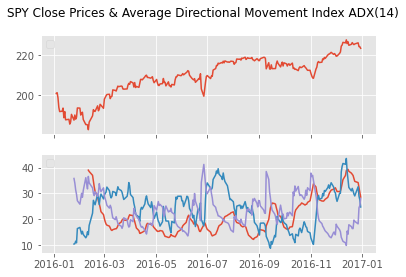

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


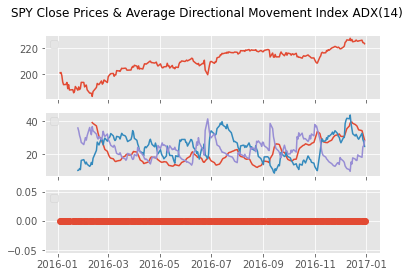

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


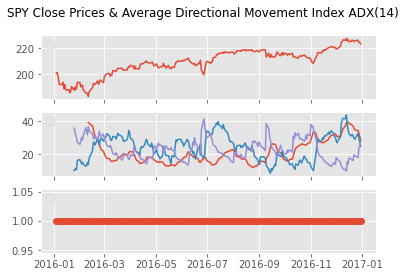

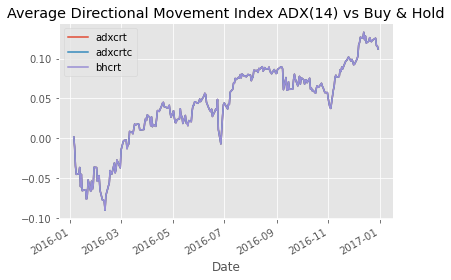

In [38]:
# 2. Average Directional Movement Index ADX(14) Calculation and Chart

# Technical Indicator Calculation
spy['adx'] = ta.ADX(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
spy['+di'] = ta.PLUS_DI(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
spy['-di'] = ta.MINUS_DI(np.asarray(spy['High']), np.asarray(spy['Low']), np.asarray(spy['Close']), timeperiod=14)
# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 3. Bands and Double Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
spy['adx(-1)'] = spy['adx'].shift(1)
spy['+di(-1)'] = spy['+di'].shift(1)
spy['-di(-1)'] = spy['-di'].shift(1)
spy['+di(-2)'] = spy['+di'].shift(2)
spy['-di(-2)'] = spy['-di'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['adxsig'] = 0
adxsig = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)'] < r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = -1
    else:
        adxsig = 0
        spy.iloc[i, 14] = adxsig
# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
ax[2].plot(spy['adxsig'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 4. Bands and Double Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
spy['adxstr'] = 1
adxstr = 0
for i, r in enumerate(spy.iterrows()):
    if r[1]['adxsig'] == 1:
        adxstr = 1
    elif r[1]['adxsig'] == -1:
        adxstr = 0
    else:
        adxstr = spy['adxstr'][i-1]
    spy.iloc[i, 15] = adxstr
# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True)
ax[0].plot(spy['Close'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['adx'])
ax[1].plot(spy['+di'])
ax[1].plot(spy['-di'])
ax[1].legend(loc='upper left')
ax[2].plot(spy['adxstr'], marker='o', linestyle='')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Average Directional Movement Index ADX(14)')
plt.show()

##########

# 5. Bands and Double Crossover Strategy Performance Comparison

# 5.1. Strategies Daily Returns
# Bands and Double Crossover Strategy Without Trading Commissions
spy['adxdrt'] = ((spy['Close']/spy['Close'].shift(1))-1)*spy['adxstr']
spy.iloc[0, 16] = 0
# Bands and Double Crossover Strategy With Trading Commissions (1% Per Trade)
spy['adxstr(-1)'] = spy['adxstr'].shift(1)
spy['adxtc'] = spy['adxsig']
adxtc = 0
for i, r in enumerate(spy.iterrows()):
    if (r[1]['adxsig'] == 1 or r[1]['adxsig'] == -1) and r[1]['adxstr'] != r[1]['adxstr(-1)']:
        adxtc = 0.01
    else:
        adxtc = 0.00
    spy.iloc[i, 18] = adxtc
spy['adxdrtc'] = (((spy['Close']/spy['Close'].shift(1))-1)-spy['adxtc'])*spy['adxstr']
spy.iloc[0, 19] = 0
# Buy and Hold Strategy
spy['bhdrt'] = (spy['Close']/spy['Close'].shift(1))-1
spy.iloc[0, 20] = 0

# 5.2. Strategies Cumulative Returns
# Cumulative Returns Calculation
spy['adxcrt'] = np.cumprod(spy['adxdrt']+1)-1
spy['adxcrtc'] = np.cumprod(spy['adxdrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['adxcrt', 'adxcrtc', 'bhcrt'])
plt.title('Average Directional Movement Index ADX(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

# 5.3. Strategies Performance Metrics
# Annualized Returns
adxyrt = spy.iloc[251, 21]
adxyrtc = spy.iloc[251, 22]
bhyrt = spy.iloc[251, 23]
# Annualized Standard Deviation
adxstd = np.std(spy['adxdrt'])*np.sqrt(252)
adxstdc = np.std(spy['adxdrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
adxsr = adxyrt/adxstd
adxsrc = adxyrtc/adxstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'ADX(14)', '2': 'ADX(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': adxyrt, '2': adxyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': adxstd, '2': adxstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': adxsr, '2': adxsrc, '3': bhsr}]
table = pd.DataFrame(data);